# Introduction to Clustering

We will look at two different clustering algorithms: K-means and DBScan.

In [1]:
%autosave 5
# I do this so that students can follow along in another notebook session

Autosaving every 5 seconds


In [2]:
%matplotlib inline
# All the usual libraries, even if we don't end up using them.
import pandas
import sklearn
import numpy
import matplotlib.pyplot
import seaborn

I found this dataset on Kaggle: it shows all the air safety incidents investigated
by the USA NTSB.

In [3]:
crashes = pandas.read_csv('AviationDataEnd2016UP.csv')
locations = crashes[crashes.Latitude.notnull() & crashes.Longitude.notnull()]
locations

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
1,20161230X55950,Accident,WPR17FA044,2016-12-29,"Dabob, WA",United States,47.823611,-122.790000,NaN,NaN,...,Personal,NaN,4.0,NaN,NaN,NaN,VMC,NaN,Preliminary,05/01/2017
3,20161227X80237,Accident,CEN17LA061,2016-12-27,"Farmington, MO",United States,37.761111,-90.428611,FAM,FARMINGTON RGNL,...,Personal,NaN,NaN,NaN,1.0,1.0,VMC,TAKEOFF,Preliminary,29/12/2016
4,20161226X80840,Accident,WPR17FA041,2016-12-26,"Fresno, CA",United States,36.844444,-119.870834,E79,Sierra Sky Park,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,05/01/2017
5,20161227X03229,Accident,ERA17FA073,2016-12-26,"Gatlinburg, TN",United States,35.651944,-83.458333,GKT,GATLINBURG-PIGEON FORGE,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,DESCENT,Preliminary,03/01/2017
6,20161223X22808,Accident,ERA17FA072,2016-12-23,"Middlebury, VT",United States,43.981389,-73.094444,6B0,MIDDLEBURY STATE,...,Personal,NaN,1.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,04/01/2017
8,20161222X21701,Accident,CEN17LA060,2016-12-21,"Millersburg, OH",United States,40.536666,81.955833,10G,Holmes County,...,Personal,NaN,NaN,NaN,1.0,1.0,VMC,APPROACH,Preliminary,27/12/2016
9,20161220X20645,Accident,CEN17LA058,2016-12-18,"Blaine, MN",United States,45.195555,-93.162778,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,05/01/2017
10,20161219X04338,Accident,CEN17LA057,2016-12-16,"Ionia, MI",United States,42.938055,-85.060556,Y70,Ionia County Airport,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,TAKEOFF,Factual,28/12/2016
11,20161216X23127,Accident,ANC17FA012,2016-12-15,"Aniak, AK",United States,60.944444,-159.620834,NaN,NaN,...,Personal,NaN,2.0,NaN,NaN,NaN,VMC,CRUISE,Preliminary,19/12/2016
12,20161212X23428,Accident,WPR17FA035,2016-12-12,"Moab, UT",United States,38.753056,-109.752778,CNY,Canyonlands Field Airport,...,NaN,Aerowest Aviation (DBA: Redtail Air),1.0,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,04/01/2017


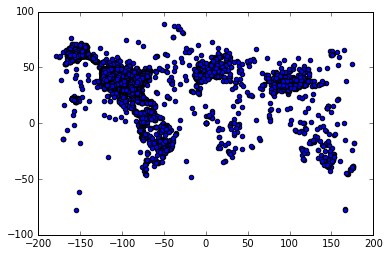

In [4]:
matplotlib.pyplot.scatter(locations.Longitude, locations.Latitude)

It's hard to tell the density in various areas. How many points are there in the
USA?

Let's have a look at kernel-density-estimate plot.

On the whole data set this takes a while to run, so let's just take 1000 random samples.

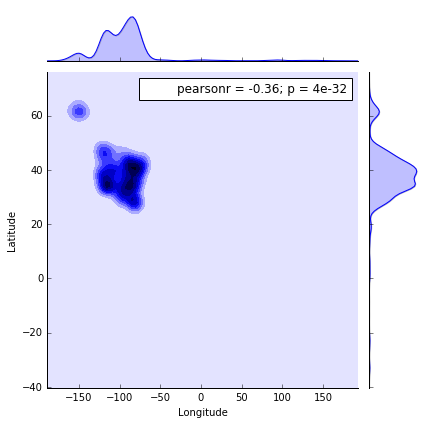

In [28]:
seaborn.jointplot(data=locations.sample(1000), x='Longitude', y='Latitude', kind='kde')

Maybe it's my imagination, but I can see the east coast of the USA, including
Miami; to the left of it I see California, and up to Seattle. And then there's
Alaska. There are a lot of USA-based events in the database, particularly on the
coasts, and relatively few elsewhere.

# KMeans

The KMeans clustering algorithm randomly picks centroids. Then it associates each 
point with its nearest centroid, and then updates each centroid to be the mean of
all the points that it was closest to.

Little by little the centroid gets shifted closer to the centre of good clusters.

The algorithm needs to be given the number of clusters.

I chose 6 because my geography teacher told me that there are 6 continents.

In [25]:
import sklearn.cluster
km = sklearn.cluster.KMeans(n_clusters=6)
clusters = km.fit_predict(locations[['Longitude', 'Latitude']])
clusters

array([0, 5, 0, ..., 0, 5, 5], dtype=int32)

If you run this again, you might end up with different numbers. e.g. 
a moment ago I had 

>  `array([2, 0, 2, ..., 2, 0, 0], dtype=int32)`
  
then the next time it was

>  `array([0, 5, 0, ..., 0, 5, 5], dtype=int32)`

Let's plot this on a scatter plot.

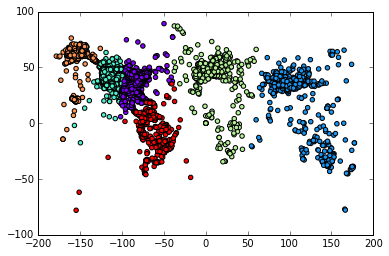

In [6]:
matplotlib.pyplot.scatter(locations.Longitude, 
                          locations.Latitude,
                         c=clusters,
                         cmap=matplotlib.pyplot.cm.rainbow)


The KMeans object has an attribute called `cluster_centers_` which is a numpy array
of where the centroids are.

In [7]:
km.cluster_centers_

array([[ -85.31596198,   36.43479287],
       [ 113.07374664,   18.21667117],
       [-114.54035806,   39.13123582],
       [   9.37439269,   39.91572354],
       [-151.56611575,   57.88813429],
       [ -64.44120823,   -2.66219795]])

So we can do some numpy array magic to get the x coordinates (longitudes) of these centroids...

In [8]:
km.cluster_centers_[:,0]

array([ -85.31596198,  113.07374664, -114.54035806,    9.37439269,
       -151.56611575,  -64.44120823])

... and their y coordinates (latitudes)

In [9]:
km.cluster_centers_[:,1]

array([ 36.43479287,  18.21667117,  39.13123582,  39.91572354,
        57.88813429,  -2.66219795])

Then I can take the same scatter plot from before and add some colourful markers.

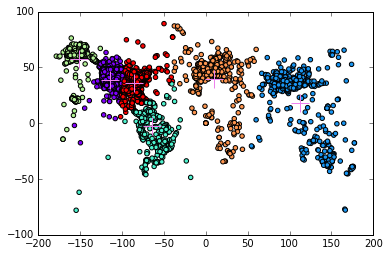

In [26]:
matplotlib.pyplot.scatter(locations.Longitude, 
                          locations.Latitude,
                         c=clusters,
                         cmap=matplotlib.pyplot.cm.rainbow)
matplotlib.pyplot.scatter(km.cluster_centers_[:,0], 
                         km.cluster_centers_[:,1],
                         marker="+", c='violet', s=300)

How good is that clustering?

It doesn't look all that good to me: there's no obvious dividing line in the middle
of the USA.

In [11]:
import sklearn.metrics

If you are feeling brave, you can calculate the silhouette score. This is a measure
that shows the ratio of cohesiveness (how close clusters members are to each other)
to the separation of clusters (how far apart clusters are).

It takes a while to run, so I've commented it out.

In [24]:
#sklearn.metrics.silhouette_score(locations[['Longitude', 'Latitude']], clusters)

A cheat is just to use a small random subset of points and calculate the silhoutte score.
Because I had two arguments (locations, clusters) that I wanted to subsample, I used
train_test_split for convenience. I ignored 90% and used 10%.

(There's no training or testing going on here. It's just a handy function to use.)

In [19]:
def approx_silhouette(df, cluster_numbers):
    from sklearn.model_selection import train_test_split
    (Xuse, Xignore, Yuse, Yignore) = train_test_split(df, cluster_numbers, test_size=0.9)
    return sklearn.metrics.silhouette_score(Xuse, Yuse)

approx_silhouette(locations[['Longitude', 'Latitude']], clusters)

0.5901357013592009

Let's try different numbers of clusters. Do any of them work well?

2 0.823853453502
3 0.547585642748
4 0.549432738885
5 0.563508692339
6 0.58647064496
7 0.465680983621
8 0.476631955797
9 0.494966330055
10 0.475429406395
11 0.428448108808
12 0.465576393517
13 0.439776329334
14 0.469068793051
15 0.482266005726
16 0.46123876566
17 0.480233951292
18 0.466703347255
19 0.463297720149


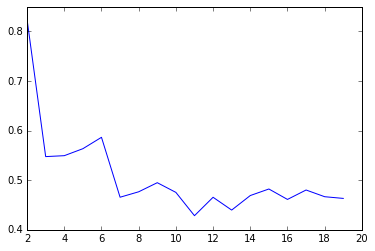

In [21]:
scores = []
for i in range(2, 20):
    km = sklearn.cluster.KMeans(n_clusters=i)
    clusters = km.fit_predict(locations[['Longitude', 'Latitude']])
    score = approx_silhouette(locations[['Longitude', 'Latitude']], clusters)
    print i, score
    scores.append(score)
matplotlib.pyplot.plot(range(2,20), scores)

Surprisingly good results are 2, 6 and 9.

What does 2 look like?

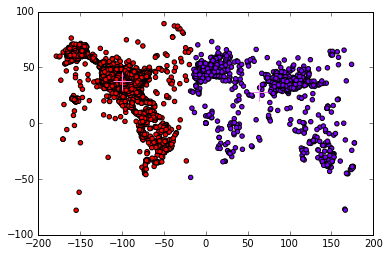

In [22]:
km = sklearn.cluster.KMeans(n_clusters=2)
clusters = km.fit_predict(locations[['Longitude', 'Latitude']])
matplotlib.pyplot.scatter(locations.Longitude, 
                          locations.Latitude,
                         c=clusters,
                         cmap=matplotlib.pyplot.cm.rainbow)
matplotlib.pyplot.scatter(km.cluster_centers_[:,0], 
                         km.cluster_centers_[:,1],
                         marker="+", c='violet', s=300)

Of course: old world versus new world.

We've seen 6; what does 9 look like?

[[ -78.05016131   40.61242409]
 [-116.54074764   39.32848037]
 [ 143.37047931  -21.34972768]
 [  98.86313506   36.11171484]
 [-151.5683521    57.90696806]
 [ -95.94672744   37.17771131]
 [   9.26861404   39.68724923]
 [ -63.05678309   -9.6267907 ]
 [ -82.66885314   30.07203037]]


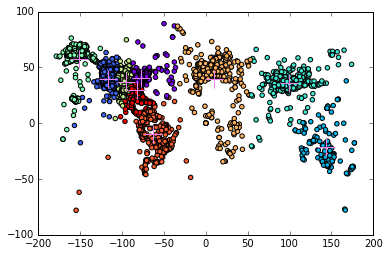

In [29]:
km = sklearn.cluster.KMeans(n_clusters=9)
clusters = km.fit_predict(locations[['Longitude', 'Latitude']])
matplotlib.pyplot.scatter(locations.Longitude, 
                          locations.Latitude,
                         c=clusters,
                         cmap=matplotlib.pyplot.cm.rainbow)
matplotlib.pyplot.scatter(km.cluster_centers_[:,0], 
                         km.cluster_centers_[:,1],
                         marker="+", c='violet', s=300)
print km.cluster_centers_

Very occasionally, KMeans can be quite sensitive to where you place the
initial centroids.

We wanted to try forcing it. The points are roughly:

- Congo (to capture African events)
- Australia
- South America
- The eastern part of the former USSR
- The USA
- Europe

In [40]:
forced_km = sklearn.cluster.KMeans(n_clusters=6 ,
                                  init=numpy.array([[25,-5],
                                        [143.37047931, -21.34972768],
                                        [ -63.05678309,  -9.6267907 ],
                                        [  98.86313506,  36.11171484],
                                        [ -95.94672744,  37.17771131],
                                         [   9.26861404 ,  39.68724923]
                                       ]))
clusters = forced_km.fit_predict(locations[['Longitude', 'Latitude']])

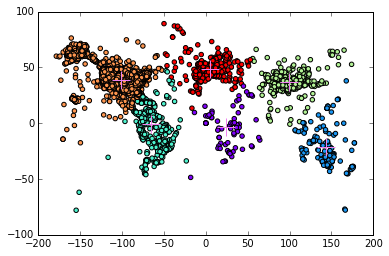

In [41]:
matplotlib.pyplot.scatter(locations.Longitude, 
                          locations.Latitude,
                         c=clusters,
                         cmap=matplotlib.pyplot.cm.rainbow)
matplotlib.pyplot.scatter(forced_km.cluster_centers_[:,0], 
                         forced_km.cluster_centers_[:,1],
                         marker="+", c='violet', s=300)

Interestingly, the centroids didn't move much. And the silhouette score is pretty good:

In [42]:
approx_silhouette(locations[['Longitude', 'Latitude']], clusters)

0.48170959982775946

# DBSCAN

It's also possible to look at clusters by doing a density based scan. Pick the radius
and the number of samples that needs to be in that radius, and declare any regions that
meets that requirement to be a cluster.

The Bermuda triangle is roughly 10 latitudes and longitudes across. Have we had 1000
mysterious aircraft incidents in that region?

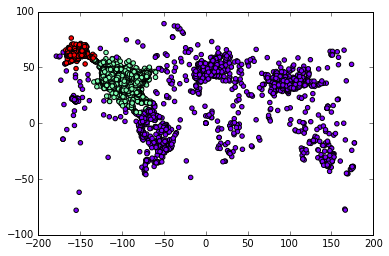

In [45]:
dbscan = sklearn.cluster.DBSCAN(eps=10., min_samples=1000)
clusters = dbscan.fit_predict(locations[['Longitude', 'Latitude']])
matplotlib.pyplot.scatter(locations.Longitude, 
                          locations.Latitude,
                          c=clusters,
                          cmap=matplotlib.pyplot.cm.rainbow)

We only see two clusters: Alaska and (roughly) the 48 contiguous USA states, together with
a few nearby countries. The data set is biased: it doesn't show events outside of the
USA unless the NTSB happened to get involved for some reason.

Also, of course, using latitude and longitude as the clustering variables means that Alaska
appears to be much bigger and wider than (say) Mexico.

The events that weren't part of a cluster were labelled as being in cluster "-1".

In [47]:
numpy.unique(clusters)

array([-1,  0,  1])

Are there any really dangerous places? Around 100km square with 50 events?

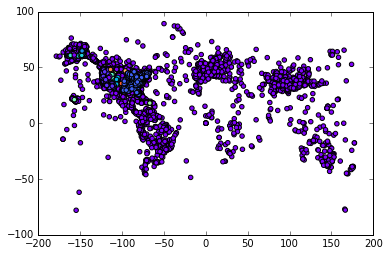

In [49]:
dbscan = sklearn.cluster.DBSCAN(eps=1, min_samples=50)
clusters = dbscan.fit_predict(locations[['Longitude', 'Latitude']])
matplotlib.pyplot.scatter(locations.Longitude, 
                          locations.Latitude,
                          c=clusters,
                          cmap=matplotlib.pyplot.cm.rainbow)

Oh dear, yes, there are. Where?

In [51]:
locations[clusters != -1].sort_values('Latitude')

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
467,20160808X90911,Accident,ERA16LA282,2016-08-07,"St. Croix, VI",United States,17.700833,-64.801111,STX,HENRY E ROHLSEN,...,Instructional,NaN,NaN,2.0,NaN,NaN,VMC,LANDING,Preliminary,17/08/2016
11848,20091029X54134,Accident,ERA10FA037,2009-10-29,"Christiansted, VI",United States,17.718889,-64.791389,TISX,Henry E. Rohlsen,...,Personal,NaN,3.0,NaN,NaN,NaN,VMC,MANEUVERING,Probable Cause,13/06/2011
15760,20071025X01653,Accident,NYC08LA008,2007-10-07,"St.Croix, VI",United States,17.742777,-64.902222,TISX,"Rohlsen Airport, St Croix USVI",...,Personal,NaN,1.0,NaN,NaN,NaN,IMC,DESCENT,Probable Cause,12/05/2009
12445,20090722X91517,Accident,ERA09LA413,2009-07-18,"Ponce, PR",United States,17.952778,-66.557500,NaN,NaN,...,Personal,NaN,1.0,NaN,NaN,NaN,VMC,MANEUVERING,Probable Cause,20/12/2010
4274,20140327X61657,Accident,ERA14LA174,2014-03-26,"Patillas, PR",United States,17.975278,-66.020834,X64,Patillas Airport,...,Personal,NaN,1.0,NaN,NaN,NaN,VMC,APPROACH,Probable Cause,27/04/2015
11719,20091203X84042,Accident,ERA10CA090,2009-12-02,"Patillas, PR",United States,17.982223,-66.019167,X64,Patillas Airport,...,Personal,NaN,NaN,NaN,NaN,2.0,VMC,TAKEOFF,Probable Cause,06/05/2010
11467,20100225X45345,Accident,ERA10CA152,2010-02-24,"Patillas, PR",United States,17.982223,-66.019445,X64,Patillas Airport,...,Instructional,NaN,NaN,NaN,1.0,1.0,VMC,TAKEOFF,Probable Cause,16/06/2010
25589,20021024X05380,Accident,MIA03LA006,2002-10-23,"Las Palmas, PR",United States,17.983333,-66.016667,X64,Patillas,...,Personal,NaN,NaN,NaN,NaN,3.0,VMC,GO-AROUND,Probable Cause,01/04/2003
1439,20151222X35249,Accident,ERA16LA076,2015-12-19,"Guanica, PR",United States,17.989722,-66.925556,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,07/01/2016
29222,20010213X00440,Accident,MIA01FA072,2001-02-08,"Ponce, PR",United States,17.996389,-66.553889,PSE,Mercedita International,...,Business,NaN,1.0,NaN,NaN,NaN,VMC,TAKEOFF,Probable Cause,02/01/2002


In [55]:
locations[clusters == 0][['Latitude', 'Longitude']].mean()

Latitude      38.883018
Longitude   -117.992445
dtype: float64

In [56]:
locations[clusters == 1][['Latitude', 'Longitude']].mean()

Latitude     36.319955
Longitude   -85.096057
dtype: float64

How many places were there like this?

In [57]:
numpy.unique(clusters)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

Any 10x10km areas with 5 incidents?

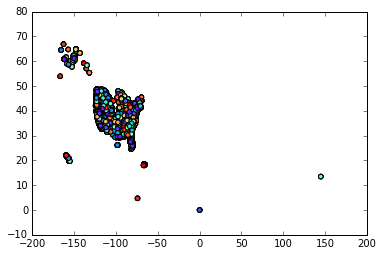

In [59]:
dbscan = sklearn.cluster.DBSCAN(eps=0.1, min_samples=5)
clusters = dbscan.fit_predict(locations[['Longitude', 'Latitude']])
matplotlib.pyplot.scatter(locations.Longitude[clusters != -1], 
                          locations.Latitude[clusters != -1],
                          c=clusters[clusters != -1],
                          cmap=matplotlib.pyplot.cm.rainbow)

If that looks like a squashed up USA, it is. The green dot on the far right 
corresponds to Guam. The blue dot at 0,0 is known as null island: the data
must have had a few entries where the latitude and longitude was left as 0,0
(probably incorrectly, since there's nothing there.)